# Machine Learn Assignment 1 : Titanic

   The formatting of my analysis will resebmle that of the textbook 'Hands-On Machine Learning with SciKit, Keras, and Tensorflow'

In this notebook I will provide an analysis and walkthrough of all the steps I took in building and selecting my model. 

- Problem Overview
>In the titanic shipwreck one of the reason why there was many causaulties due to the lack of lifeboats. There is an element of luck invalid in determining which passengers survived, but the goal of this problem is to build a model that can use passenger data to determine how likely they were to survive in comparison to others.

- Solution Approach
>In order to be able to build a successful model, we must first analyze the data to determine which attributes are relavant to a passengers survivability. As well given that the data is not complete we must handle NaN values. As well we will use feature engineering, and hyperparameter tuning in attempts to reach an accurate model.

## Overview
1. Data Exploration
2. Data Visualization
3. Data Preparation
4. Basic Model Building
5. Model Tuning
6. Results
7. Future Improvements

## 1) Data Exploration

We begin by first importing both the training and test data set
that is stored locally.

We then load in the data and create a copy, to prevent any unintentional modifications to the original dataset we will be using a copy.

Next we will use DataFrame's head() and info() methods to get a better understanding of the data we will be working with.

### DataFrame.head()
From the first five rows we can see the different types of data.
The dataset consists of 12 attributes. As we can see not all the values are numerical (Name, sex, emabarked, etc...) we will handle these in the "Data Preprocessing" section.


### DataFrame.info()
Using info() we discoverd that the attribute 'Age', 
'Embarked' and 'Cabin' contain NaN values. We will handle these values in the "Data Cleaning" section. Just like we noticed when using head(), by looking at the 'Dtype' we can see not all attributes consist of numerical data. Once again we will handle this in the "Data Preprocessing" section.


### DataFrame.describe()
Using describe() it will provide us with useful information for the future. Values such like mean, std, 25% 50%, 75% will be useful in the future.

In [1]:
import pandas as pd

def load_train_data():
    path = "./dataset/train.csv"
    train_df = pd.read_csv(path)
    return train_df

def load_test_data():
    path = "./dataset/test.csv"
    test_df = pd.read_csv(path)
    return test_df

In [2]:
titanicData = load_train_data()
titanicCopy = titanicData.copy()


In [3]:
titanicCopy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanicCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanicCopy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2) Data Visualization

### Scatter Matrix
The scatter matrix is used on the numerical attributes listed to see if there are any strong correlations with the attribute 'Survived'

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<A

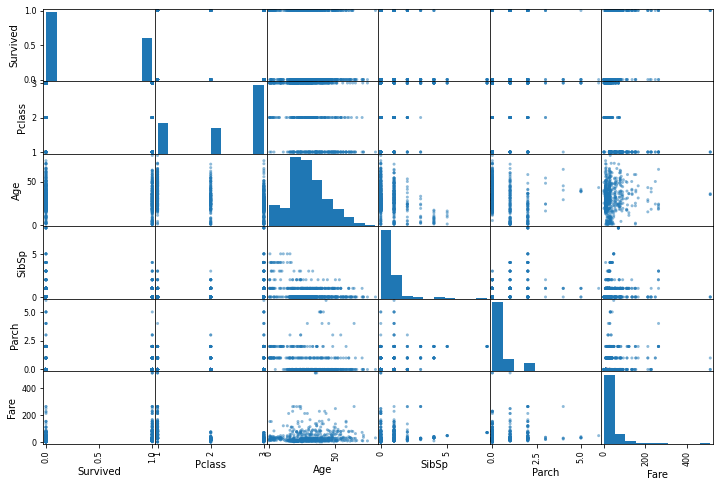

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pylab as plot
from pandas.plotting import scatter_matrix

attributes = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',]

scatter_matrix(titanicCopy[attributes], figsize=(12,8))

### GroupBy
Using Pandas GroupBy feature we are able to display the ratio of Survived to Died in respect to other attributes. After seeing this data we can determine that these features do provide insight and therefore will be used in our model.
>#### Age
We can see the outter limits of the group show the passengers who were younger and older had a better chance at survival than those in the middle.
>#### Sex
We can see females survived at a significantly higher rate than males
>#### Fare
Passengers who's fare was on the lower end survived at a very low rate, while passengers who's fare was on the higher end survived at high rate.
>#### SibSp and Parch
Both showed similar trends, the lower values survived at a higher rate than the larger values. It is also worth noting the values for each graph that resulted in an incredibly low survival rate. These two features are worth combining to provide the model with more generic data.
>#### Embarked and Pclass
The first two values were near the relatively close to the 50% mark thus they are not worth noting, however it is worth noting the Embarked's S values and Pclass' 3 values as they both showed a survival rate below 40%


In [7]:

titanicCopy['Died'] = 1 - titanicCopy['Survived']
attributes = ['Age', 'Sex', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Pclass']
for label in attributes:
    titanicCopy.groupby(label).agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                            stacked=True);

## 3) Data Preparation

### Data Cleaning
As we saw in the "Data Exploration" section, some of the attributes contained NaN values. As well some attributes contained non numeric values.
>#### Filling the Data
    Using the SimpleImputer we will use the strategy 'mean' to fill all NaN values with the attributes mean value. This is done in the fillEmptyData method.
    It is worth noting, we fill the missing numerical data now as we need it complete in order to generate the new attribute columns
    

>#### Non Numeric Attributes
    From our data visualization we determined that the attributes Age and Fare both provided valuable information in terms of survival rates. In order to provide the model with these attributes we must transform the data into numeric values. In order to do so we will first split the values into ranges then using one hot encoding we will transform these range values into attributes where their values will be binary.
    The methods 'setFareCategory' and 'setAgeCategory' will handle the value range catories.
    The age range values were selected based on the generic social division that are used in society.
    The fare range values were selected based on the percentiles values found when using describe(), as mentioned in the "Data Exploration" section

In [8]:
from sklearn.impute import SimpleImputer

def fillEmptyData(data_df):
        imputer = SimpleImputer(strategy='mean')
        imputer.fit(data_df)
        data_complete = imputer.transform(data_df)

        complete_df = pd.DataFrame(data_complete, columns=data_df.columns, index=data_df.index)
        return complete_df

In [9]:
def setFareCategory(data_df):
    
    fareData = []
    for i in data_df.index:
        fare = data_df["Fare"][i]
        if fare < 8:
            fareData.append("Lowest Fare")
        elif fare < 14:
            fareData.append("Low Fare")
        elif fare < 31:
            fareData.append("Medium Fare")
        else:
            fareData.append("Expensive")
            
            
    temp={'FareCat':fareData}
    tempdf = pd.DataFrame(data=temp)
    data_df['FareCat']=fareData
    
    return data_df

In [10]:
def setAgeCategory(data_df):

    ageData = []
    for i in data_df.index:
        age = data_df["Age"][i]
        if age < 6:
            ageData.append("Infant")
        elif age < 13:
            ageData.append("Child")
        elif age < 19:
            ageData.append("Teenager")
        elif age < 35:
            ageData.append("Young Adult")
        elif age < 60:
            ageData.append("Adult")
        else:
            ageData.append("Elderly")
            
    temp={"AgeCat":ageData}
    tempdf = pd.DataFrame(data=temp)
    data_df["AgeCat"]=ageData
        
    return (data_df)


### Feature Engineering
After exploring our data we determined that Parch and SibSp both consisted of data that was related to one another. In attempts to prevent overfitting of our model, we will combine these two attributes into one attribute called 'FamilySize'

The method setFamilySize will do just that.

In [11]:
def setFamilySize(data_df):
    familyData = []

    for x in data_df.index:
        valueSibs = data_df["SibSp"][x]
        valueParch = data_df["Parch"][x]
        if valueSibs > 0 or valueParch > 0:
            familyData.append(valueSibs+valueParch+1)
        else:
            familyData.append(1)

    data_df['FamilySize']=familyData
    return data_df

### Final Preparations

>#### prepData()
Now that we have established how we will handle our non-numeric and missing values, we will now wrap up the preparations.
We will call the method 'prepData()', this method will call the Data Cleaning methods described above.

In [12]:
def prepData(data_df):
    
    cat_df = data_df[["Name","Sex","Ticket", "Cabin", "Embarked"]].copy()
    num_df = data_df[["PassengerId","Pclass", "Age", "SibSp", "Parch", "Fare"]].copy()
    
    num_complete_df = fillEmptyData(num_df)
    data_df = pd.concat([num_complete_df, cat_df], axis=1)
    
    data_df = setFamilySize(data_df)
    data_df = setFareCategory(data_df)
    data_df = setAgeCategory(data_df)
    
    return data_df

In [13]:
titanic_df = prepData(titanicData)


>#### ColumnTransfer
    After calling prepData we have received the complete data set. However we still have the issue of some attributes (age,fare) being range values and not scaling our data.
    This is where ColumnTransfer comes into play. Below I created num_pipeline which will take all the numerical data and scale it. Then cat_pipline will take all the categorical attributes and fill in any missing values using 'most_frequent' and use OneHotEncoder to turn the categorical range values into numerical attributes.
    All these steps will be completed by calling full_pipeline

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
        ])

In [15]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("imputer_cat", SimpleImputer(strategy="most_frequent")),
    ("1hot_cat", OneHotEncoder())
    ])

In [16]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Pclass","FamilySize"]
cat_attribs = ["Sex","Embarked","AgeCat",'FareCat']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [17]:

dataPrepared = full_pipeline.fit_transform(titanic_df)
y_data = titanicCopy["Survived"].copy()

# X_train = dataPrepared[711:]
# X_test = dataPrepared[:711]
# y_train = y_data[711:]
# y_test =y_data[:711]

## 4) Basic Model Building

#### Models
For the basic model building I decided to use the required naive bayes, perceptron, decision tree. As well as random forest, logisitic regression,KNN, support vector in attempts to achieve better results.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier()
rfc.fit(dataPrepared, y_data)
cv_rfc = cross_val_score(rfc,dataPrepared, y_data, cv=5)

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(dataPrepared, y_data)
cv_lr = cross_val_score(lr,dataPrepared, y_data,cv=5)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(dataPrepared, y_data)
cv_knn = cross_val_score(knn,dataPrepared, y_data,cv=5)

In [21]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(dataPrepared, y_data)
cv_svc = cross_val_score(svc,dataPrepared, y_data,cv=5)

In [22]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(dataPrepared, y_data)
cv_perceptron = cross_val_score(perceptron,dataPrepared, y_data,cv=5)

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(dataPrepared, y_data)
cv_tree = cross_val_score(tree,dataPrepared, y_data,cv=5)

In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(dataPrepared, y_data)
cv_nb = cross_val_score(nb,dataPrepared, y_data,cv=5)

#### Evaluation Metrics
In order to decide which models to proceed with, I used the mean cross validation score.


In [25]:
models = pd.DataFrame({
    'Model': ["Random Forest Classifier",  "Logistic Regression", 
              "KNN", "Support Vector Machines", "Perceptron", "Decision Tree", "Naive Bayes"], 
    'Score': [cv_rfc.mean(), cv_lr.mean(), cv_knn.mean(), cv_svc.mean(), cv_perceptron.mean(), cv_tree.mean(), cv_nb.mean()]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest Classifier,0.829465
3,Support Vector Machines,0.823784
5,Decision Tree,0.822692
2,KNN,0.803697
1,Logistic Regression,0.797985
6,Naive Bayes,0.771144
4,Perceptron,0.759940


## 5) Model Tuning

From our basic model cross validation scores we will select our best two models, Random Forest Classifier and SVC to fine tune. As well as the three from the assignment outline, Decision Tree, Naive Bayes, and Perceptron

For all models the hyperparameters were selected based on the documention and some quick research on which hyperparameters are most important.

>#### Random Forest Classifier



In [26]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 500]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [10, 40]
bootstrap = [True, False]
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'bootstrap': bootstrap}



rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(estimator=rfc, param_grid=grid, cv = 5, n_jobs=-1)
grid_rfc.fit(dataPrepared, y_data)

cv_grid_rfc = cross_val_score(grid_rfc,dataPrepared, y_data, cv=5)
cv_grid_rfc.mean()

0.8272048207896553

>#### SVC

In [37]:
C = [0.1,1,10,100]
gamma = [1, 0.1, 0.01, 0.001]
kernel = ['rbf', 'poly', 'sigmoid']

grid = {'C': C,
       'gamma': gamma,
       'kernel':kernel}

svc = SVC()
grid_svc = GridSearchCV(estimator=svc, param_grid=grid, cv = 5, n_jobs=-1)
grid_svc.fit(dataPrepared, y_data)

cv_grid_svc = cross_val_score(grid_svc,dataPrepared, y_data, cv=5)
cv_grid_svc.mean()

0.817048521750047

>#### Perceptron

In [27]:
penalty = ['l2', 'l1', 'elasticnet', None]
fit_intercept = [True, False]
max_iter = [1000, 1500, 2000]
shuffle = [True, False]
validation_fraction =[0.1, 0.5, 0.9]

grid = {'penalty': penalty,
       'fit_intercept':fit_intercept,
       'max_iter':max_iter,
       'shuffle':shuffle,
       'validation_fraction':validation_fraction}

perceptron = Perceptron()
grid_perceptron = GridSearchCV(estimator=perceptron, param_grid=grid, cv = 5, n_jobs=-1)

grid_perceptron.fit(dataPrepared, y_data)

cv_grid_perceptron = cross_val_score(grid_perceptron,dataPrepared, y_data, cv=5)
cv_grid_perceptron.mean()

0.6588789153223276

>#### Decision Tree

In [28]:
max_features = ['log2', 'sqrt','auto']
criterion = ['entropy', 'gini']
max_depth = [5, 15, 30]

grid = {'max_features': max_features,
       'criterion': criterion,
       'max_depth': max_depth}


tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(estimator=tree, param_grid=grid, cv = 5, n_jobs=-1)

grid_tree.fit(dataPrepared, y_data)

cv_grid_tree = cross_val_score(grid_tree,dataPrepared, y_data, cv=5)
cv_grid_tree.mean()

0.8136902893729208

>#### Naive Bayes

In [29]:
var_smoothing = np.logspace(0, -9, num=100)
grid = {'var_smoothing':var_smoothing}

nb = GaussianNB()
grid_nb = GridSearchCV(estimator=nb, param_grid=grid, cv = 5, n_jobs=-1)

grid_nb.fit(dataPrepared, y_data)

cv_grid_nb = cross_val_score(grid_nb,dataPrepared, y_data, cv=5)
cv_grid_nb.mean()

0.7677860774590421

#### Model Comparison

Once the GridSearch returns the best parameters, we will retrain the models using the new hyperparameters. Then we will once again use cross validation to compare the results to the default hyperparameters. From there we will be able to select our best model.

In [39]:
modelsTuned = pd.DataFrame({
    'Model': ["Random Forest Classifier", "SVC", "Perceptron", "Decision Tree", "Naive Bayes"], 
    'Default Score': [cv_rfc.mean(), cv_svc.mean(), cv_perceptron.mean(), cv_tree.mean(), cv_nb.mean()],
    'Tuned Score': [cv_grid_rfc.mean(),cv_grid_svc.mean(), cv_grid_perceptron.mean(), cv_grid_tree.mean(), cv_grid_nb.mean()]
})

modelsTuned.sort_values(by='Default Score', ascending=False)

,Model,Default Score,Tuned Score
0,Random Forest Classifier,0.829465,0.827205
1,SVC,0.823784,0.817049
3,Decision Tree,0.822692,0.813690
4,Naive Bayes,0.771144,0.767786
2,Perceptron,0.759940,0.658879


## 6) Results
Kaggle Submissions will be made for the top 3 scores. The best result will be shown below.

In [42]:
test_data = load_test_data()
test_df = prepData(test_data)
prepared_test = full_pipeline.fit_transform(test_df)
svc_final = SVC()
svc_final.fit(dataPrepared, y_data)

final_prediction = svc_final.predict(prepared_test)

final_data = {"PassengerId" : test_data.PassengerId, "Survived" : final_prediction}
submission = pd.DataFrame(data=final_data)
submission.head()
submission.to_csv("Final_Submission_svc.csv", index=False)

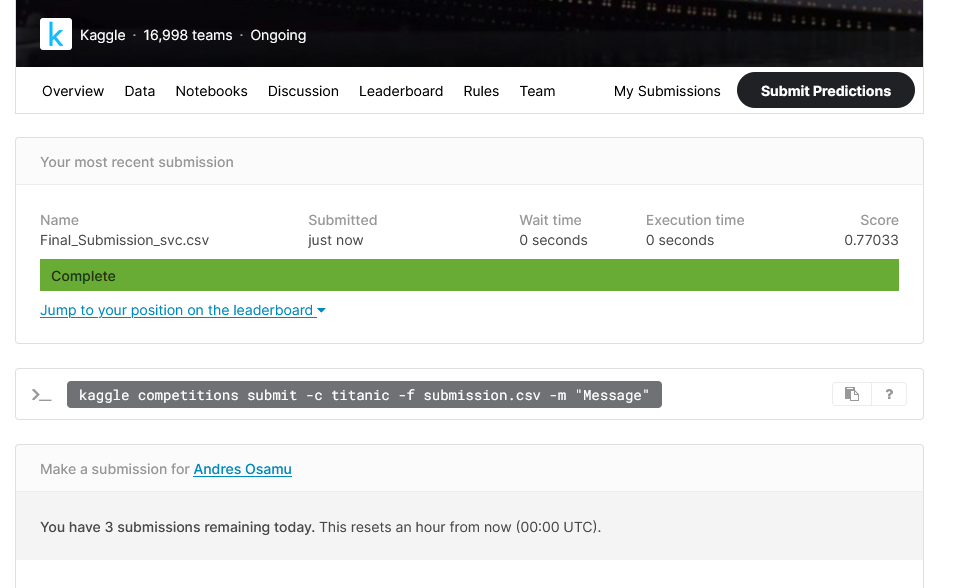

In [43]:
from IPython.display import Image
Image(filename='Kaggle_Results_SVC.png')

## 7) Future Improvements

- Overfitting
>- Based on some testing the models perform better when not given the complete training dataset (X_train found just above basic modeling section)

- Potential Improvement ideas
>- The final models did not make use of all the attributes from the original data set, further analysis and feature engineering could potentially improve the model's accuracy
>- Another opportunity for improvement would result from more indepth grid search. Given that all the hyperparameters found resulted in a decrease in accuracy.